In [3]:
#install.packages('data.table')
library(data.table)

# STAT 5310
## Simple Linear Regression
#### Lab 1  /  Homework #1


1. Height and weight data (Data file: Htwt) The data file give ht = height in centimeters and wt = weight in kilograms for a sample of n = 10 18-year-old girls. The data are taken from a larger study. Interest is in predicting weight from height.

In [4]:
data = fread('https://raw.githubusercontent.com/wilsonify/AppliedRegression/master/data/htwt.txt')

a.	Draw a scatterplot of wt on the vertical axis versus ht on the horizontal axis. On the basis of this plot, does a simple linear regression model make sense for these data? Why or why not?

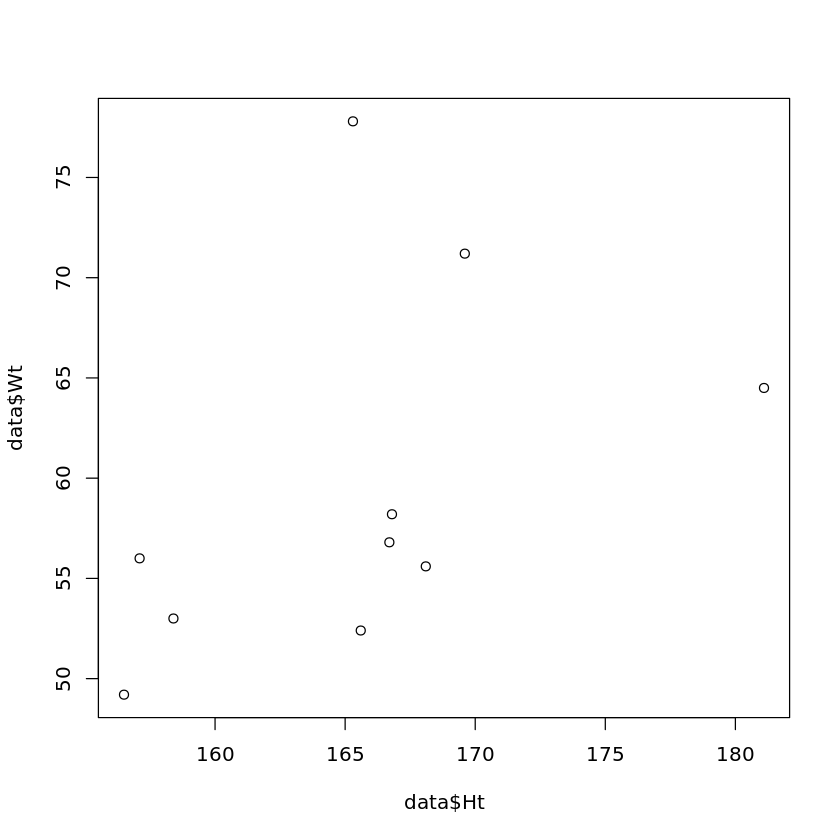

In [26]:
plot(x=data$Ht,y=data$Wt)

Visually, there is a small positive correlation between Ht and Wt. Using simple linear regression to predict weight from height may not be very accurate. 

b.	Compute estimates of the slope and the intercept for the regression of Y on X. Draw the fitted line on your scatterplot.

In [ ]:
fit <- lm(data = data,formula = Wt~Ht)
summary_of_fit <- summary(fit)
coef_of_summary <- coef(summary_of_fit)
anova_of_fit <- anova(fit)

(Intercept)          Ht 
  -36.87588     0.58208

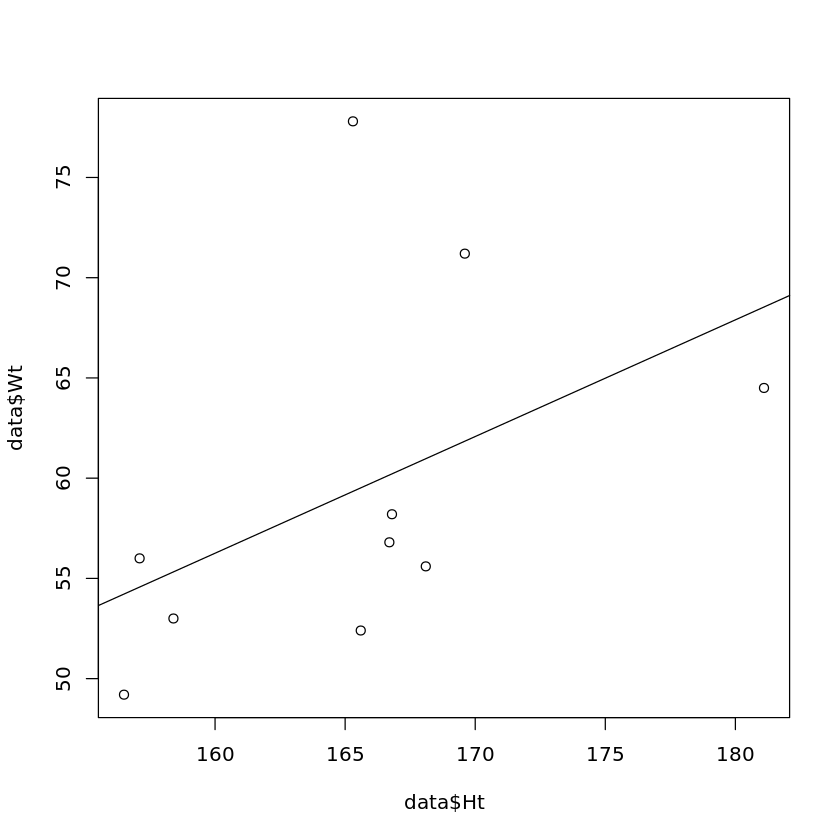

In [29]:
part_b <- fit$coefficients
part_b
plot(x=data$Ht,y=data$Wt)
abline(fit)

c.	Obtain the estimate of σ2 and find the estimated standard errors of ˆβ0 and ˆβ1. Compute the t-tests for the hypotheses that β0 = 0 and that β1 = 0 and find the appropriate p-values using two-sided tests.

In [31]:
part_c <- summary_of_fit$sigma^2
part_c
coef(summary_of_fit)

[1] 71.5017

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-36.87588,64.4728000,-0.5719603,0.5830589
Ht,0.58208,0.3891815,1.4956517,0.1731089


d.	Examine the residuals and discuss.

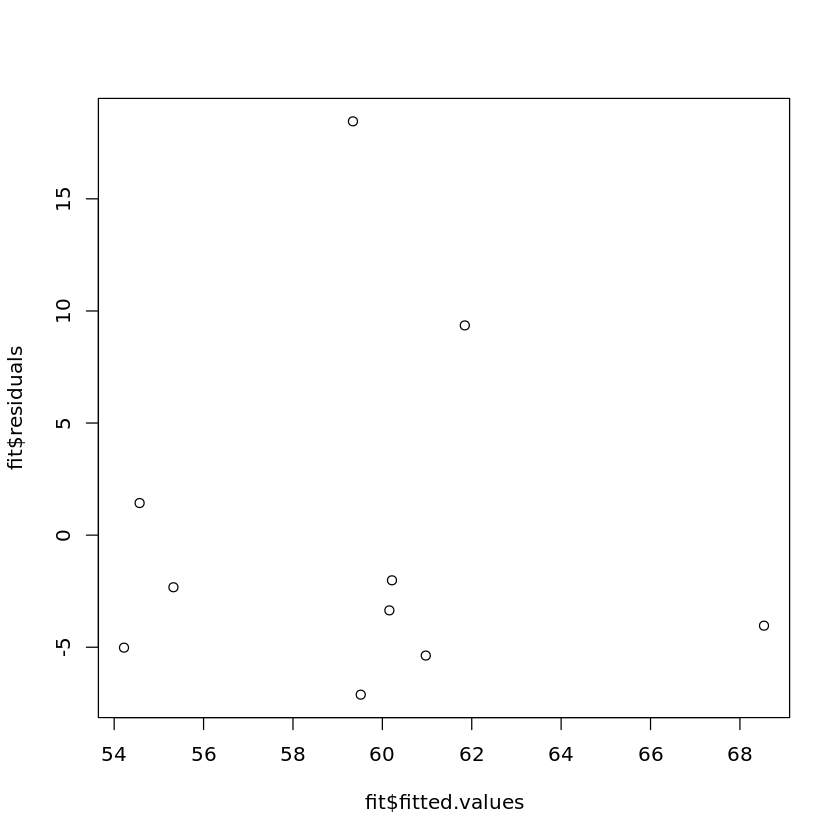

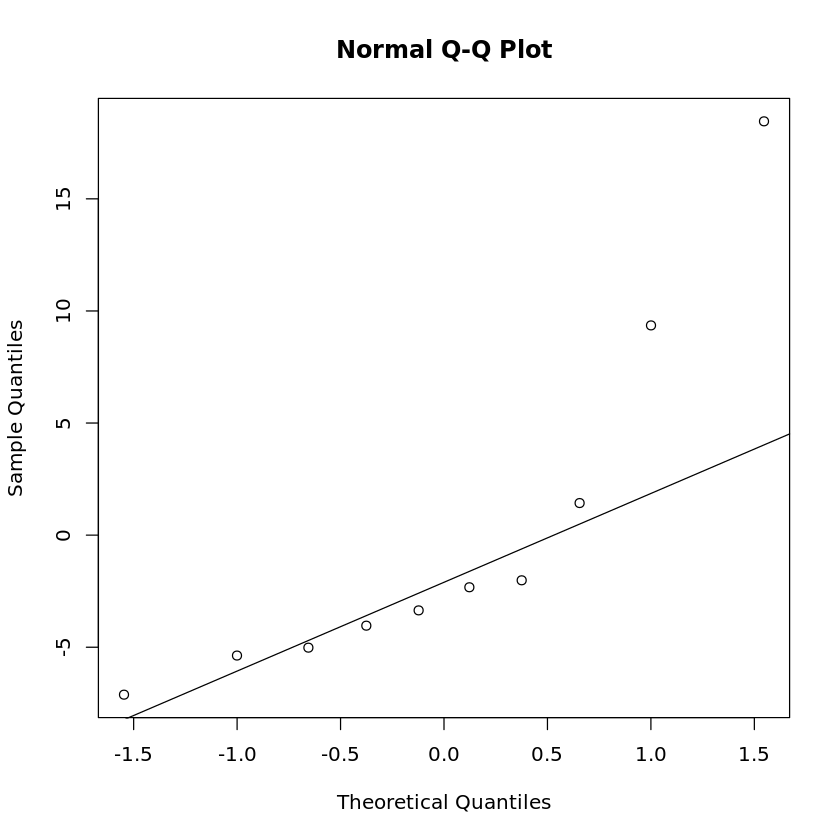

In [32]:
plot(y=fit$residuals,x=fit$fitted.values)
qqnorm(y=fit$residuals)
qqline(y=fit$residuals)

The residuals are mostly less than zero with 2 or three large outliers above zero. This does not conform well to the assumptions of simple linear regression.

In [33]:
#check answers
x <- data$Ht
y <- data$Wt
n <- length(x)
df <- n-2
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
rss <- sum((y-predict_y)^2)
s <- sqrt(rss/df)
s_B1 <- s/sqrt(sxx) 
B1_0 <- 0 #null hypothesis
t <- (B1-B1_0)/s_B1
p_value <- pt(-abs(t),df)+(1-pt(abs(t),df)) #two-tails